<a href="https://colab.research.google.com/github/imarariyal/Breast-Cancer-Mortality-Prediction/blob/main/Mortality%20Status%20Classification%20Modelling%20%26%20Hyperparameters%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Notebook 2: Mortality Status Classification Modelling & Hyperparameters Tuning

In [1]:
#Author: Imara Riyal
#Reviewer Name: Charuny Vijayraj
#Review date: 15/3/2025

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
data = pd.read_csv('/content/Mortality_Status_Dataset.csv')
data.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,68,0,0,0,1,3,1,4,1,1,24.0,1,0
1,50,1,1,2,0,2,1,35,1,1,14.0,5,0
2,58,2,2,4,0,2,1,63,1,1,14.0,7,0
3,58,0,0,0,1,3,1,18,1,1,2.0,1,0
4,47,1,0,1,1,3,1,41,1,1,3.0,1,0


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [5]:
fig = px.scatter(data, x='Tumor_Size', y='Age', color='Mortality_Status', width=800, height=800, title='Tumor Size vs Age by Mortality Status')
fig.show()

In [6]:
feature_cols = [
    'Age',
    'T_Stage',
    'N_Stage',
    '6th_Stage',
    'Differentiated',
    'Grade',
    'A_Stage',
    'Tumor_Size',
    'Estrogen_Status',
    'Progesterone_Status',
    'Regional_Node_Examined',
    'Regional_Node_Positive'
]

X = data[feature_cols]  #features
y = data['Mortality_Status']  #target

#printing the feature columns one per line
print("Feature columns used:")
for col in feature_cols:
    print(col)

Feature columns used:
Age
T_Stage
N_Stage
6th_Stage
Differentiated
Grade
A_Stage
Tumor_Size
Estrogen_Status
Progesterone_Status
Regional_Node_Examined
Regional_Node_Positive


In [7]:
#split the dataset into training and testing parts.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
#print the shape of the entire dataset, training set and test set
print('Whole Data shape', data.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (4012, 13)
X_train shape (2808, 12)
X_test shape (1204, 12)


In [9]:
print("Training labels distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting labels distribution:")
print(y_test.value_counts(normalize=True))

Training labels distribution:
Mortality_Status
0    0.846866
1    0.153134
Name: proportion, dtype: float64

Testing labels distribution:
Mortality_Status
0    0.847176
1    0.152824
Name: proportion, dtype: float64


Naive Bayes

In [10]:
#Build a Naïve Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

In [11]:
#Evaluate Naïve Bayes model
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1020
           1       0.31      0.36      0.33       184

    accuracy                           0.78      1204
   macro avg       0.59      0.61      0.60      1204
weighted avg       0.79      0.78      0.78      1204



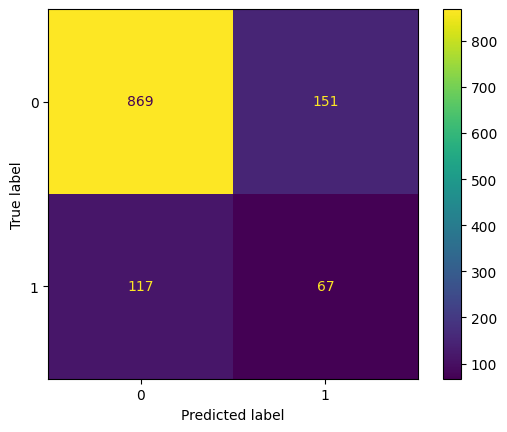

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

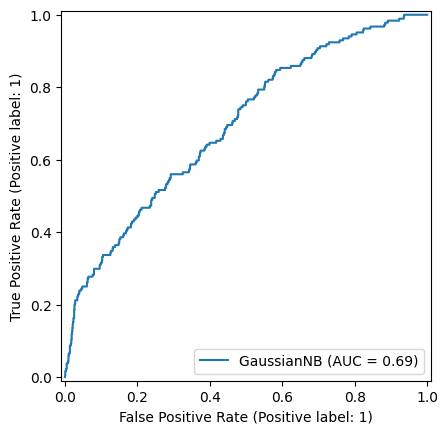

In [13]:
#ROC Curve
from sklearn.metrics import RocCurveDisplay
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#Scale your input variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [16]:
#Instantiate the Model
#import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred_train=logreg.predict(X_train)

In [18]:
y_pred=logreg.predict(X_test)

In [19]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
1900,0,0
2344,0,0
2675,0,0
625,0,0
2252,0,0
...,...,...
3852,0,0
2718,0,0
2079,0,0
3481,0,0


In [20]:
#assess how well the model learnt the training patients subset.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.8564814814814815


In [21]:
#assess how well model predicts the mortality status of new cancer patients.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8554817275747508


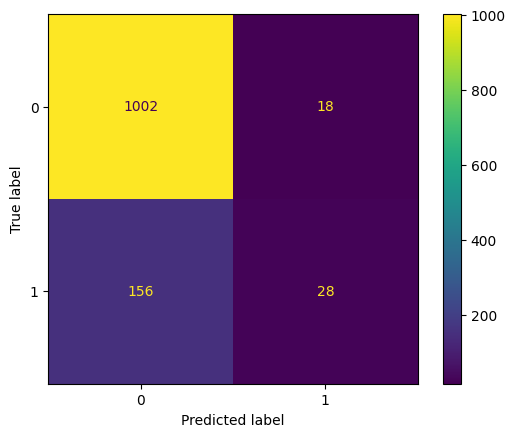

In [22]:
#assess how well the model predicted the mortality status of all new cancer patients in the unseen data subset.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
disp.plot()

In [23]:
#assessing the mortality status model's accuracy classification performance on unseen data can be misleading.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1020
           1       0.61      0.15      0.24       184

    accuracy                           0.86      1204
   macro avg       0.74      0.57      0.58      1204
weighted avg       0.83      0.86      0.82      1204



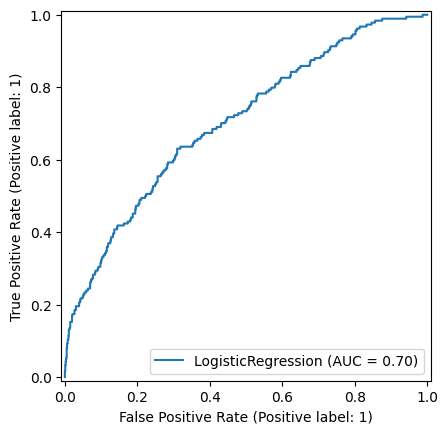

In [24]:
#ROC Curve
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

KNN

In [25]:
#initiate a machine learning library and function to use the KNN modelling algorithm.
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
1900,0,0
2344,0,0
2675,0,0
625,0,0
2252,0,0
...,...,...
3852,0,0
2718,0,0
2079,0,0
3481,0,0


In [27]:
#Evaluate the model
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1020
           1       0.19      0.04      0.06       184

    accuracy                           0.83      1204
   macro avg       0.52      0.50      0.48      1204
weighted avg       0.75      0.83      0.78      1204



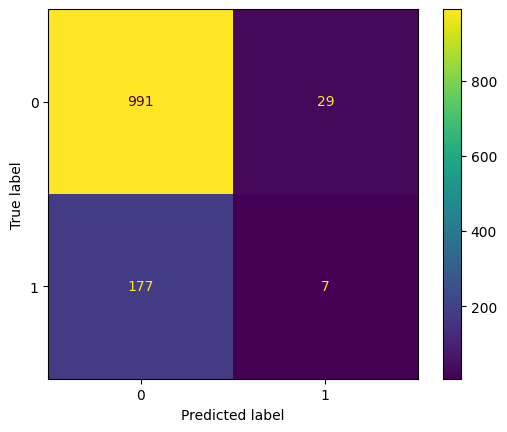

In [28]:
#confusion matrix
#Costruct the confusion matrix based on:
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

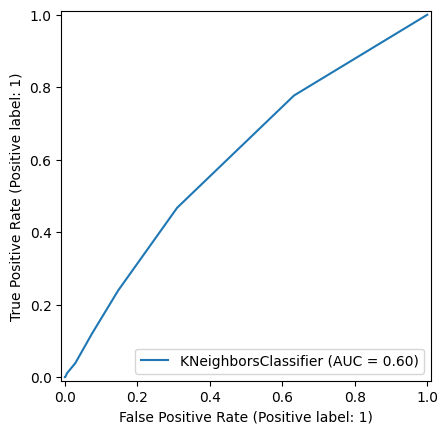

In [29]:
#ROC Curve
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Hyperparameter Tuning

In [30]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000],
    'class_weight': ['balanced']
    }

In [31]:
# Set up GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Create a new instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000) # Create a new instance

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1') # Use the new instance
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [1000],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [32]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}


In [33]:
# Best model
best_logreg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_logreg.predict(X_test)

In [34]:
print(grid_search.best_params_)

{'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1020
           1       0.27      0.59      0.37       184

    accuracy                           0.70      1204
   macro avg       0.59      0.65      0.59      1204
weighted avg       0.81      0.70      0.73      1204



Text(0.5, 1.0, 'Confusion Matrix - Tuned Logistic Regression')

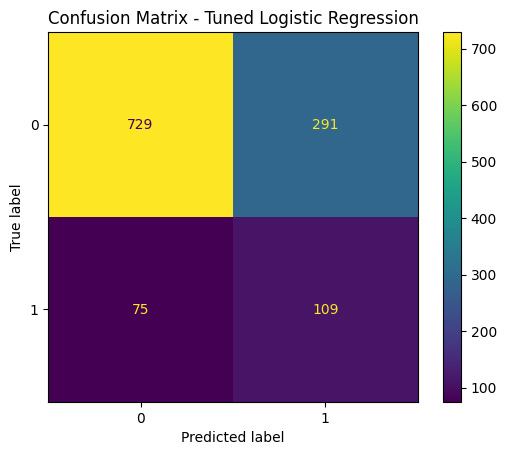

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Construct the confusion matrix cm
# Use best_logreg instead of logreg to access classes_ attribute
cm = confusion_matrix(y_test, y_pred, labels=best_logreg.classes_)

# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=best_logreg.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Tuned Logistic Regression")

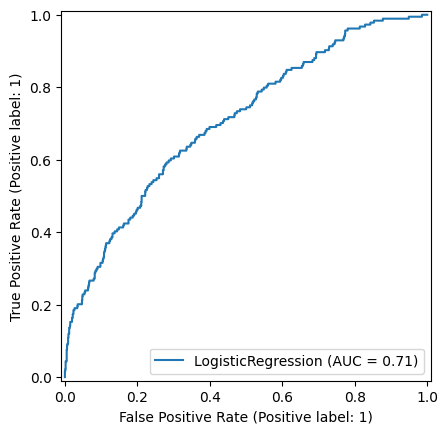

In [37]:
#ROC Curve
tuned_logreg = RocCurveDisplay.from_estimator(best_logreg, X_test, y_test)